## This notebook plots a planar curve given its curvature.


First import the python packages we will be using:

In [2]:
import math               #basic mathematical functions.
import numpy as np        #numerical methods package.
from scipy.integrate import odeint #numerical ode integrater
import matplotlib.pyplot as plt    #plotting library.

Next input the domain $[a,b]$, of the curvataure function and
the curvature function $k(s)$:

In [3]:
#edit the values of a and b as required.
a = 0
b = 2*np.pi
def k(s):
    "The curvature.  Edit as needed."
    return s


If $\mathbf c\colon [a,b]\to \mathbb R^2$ is a unit speed
curve with curvature $k$ and given by $\mathbf c(s) = (x(s),y(s))$, then the unit tangent is
$$
\mathbf t = \frac{d\mathbf c}{ds} = \left( \frac{dx}{ds},\frac{dy}{ds}\right)
$$
and the unit normal is 
$$
\mathbf n = \left( - \frac{dy}{ds} , \frac{dx}{ds}\right).
$$
The basic equation defining curvature is
$$
 \frac{d \mathbf t}{ds} = k(s) \mathbf n 
$$
In terms of the functions $x(s)$ and $y(s)$ and usng
$\mathbf c'(s)=\mathbf t$ this becomes 
$$
\left( \frac{d^2x}{ds^2}, \frac{d^2y}{ds^2}\right)
  = k(s)\left(- \frac{dy}{ds}, \frac{dx}{ds}\right) .
$$
Equating the components gives
\begin{align}
\frac{d^2x}{ds^2}&= -k(s) \frac{dy}{ds}\\
\frac{d^2y}{ds^2}&= k(s) \frac{dx}{ds}.
\end{align}
Unfortunately the numerical differential equation solver we are using 
does not like working directly with second (or higher) derivatives.
But it does not mind have large numbers of dependent variables.
So we just add some variables for the first derivatives.
As $\mathbf c'(x) = (x'(s),y'(s)) = \mathbf t(s) =(t_1(s),t_2(s))$
we use $t_1$ and $t_2$ as names for the first derivatives of $x$
and $y$.  The the system of differential equations relating
$x(s)$ and $y(s)$ to the curvature $k(s)$ becomes
\begin{align}
\frac{dx}{ds}&= t_1\\
\frac{dy}{ds}&= t_2\\
\frac{dt_1}{ds}&= -k(s) t_2\\
\frac{dt_2}{ds}&= k(s)t_1.
\end{align}
The differential equation integrator wants all these 
variables packed into one list.  We call call this 
list $C=[x,y,t_1,t_2]$.  Here is the python code that defines
the equation for the curve.

In [4]:
def curve_eqn(C,s):
    """"
    Given input a list [C[0],C[1],C[2],C[3]] = [x,y,t_1,t_2]
    this function outputs the values of [dx/ds,dy/ds,dt_1/ds,dt_2/ds]
    as given by the differential euqations above.
    """
    return [C[2],C[3], -k(s)*C[3],k(s)*C[2]]

Tell python the initial conditions for the equation (we use
$\mathbf c(a) = (0,0)$ and $\mathbf t(a) = (1,0)$) and the 
domain.

In [5]:
C0 = [0,0,1,0]  #the initial condition
domain = np.linspace(a,b,500) # the domain divided into 500 pieces.

Have the numerical differential equation package find the solution
and then store the $x$ and $y$ values.

In [6]:
curve = odeint(curve_eqn,C0,domain)
x = curve[:,0]
y = curve[:,1]

And plot the curve.

(-0.06911586700114013,
 1.4514332070239426,
 -0.06327408969824998,
 1.3287558836632496)

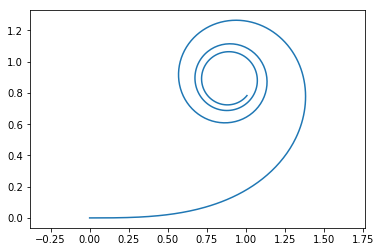

In [11]:
plt.plot(x,y)
plt.axis('equal')